**Key Findings**

* No relation exists between danceablity % and total number of streams.
* The most popular songs this year are released on 2022,2021 and 2020 in descending order.
* No relation exists between bpm and total number of streams.
* Major mode is streamed more. (Major mode sounds bright, happy, and stable, with a specific pattern of intervals. Minor mode evokes a darker, sadder, and more introspective mood, with a distinct interval pattern.)


In [27]:
# used libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.stats import pointbiserialr

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d nelgiriyewithana/top-spotify-songs-2023

  0% 0.00/47.1k [00:00<?, ?B/s]
100% 47.1k/47.1k [00:00<00:00, 47.3MB/s]


In [4]:
!unzip -q top-spotify-songs-2023.zip -d ./dataset


In [6]:

#  Read a CSV file into a DataFrame
# latin1 prevents encoding error for this specific database
df = pd.read_csv('./dataset/spotify-2023.csv', encoding='latin1')


# Getting the overall status

In [7]:
summary_stats = df.describe()
print(summary_stats)


       artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000          

In [8]:
# printing out the columns
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

# Finding the relation between danceablity & number of streams
“67% of the app’s [Tik Tok] users are more likely to seek out songs on music-streaming services after hearing them on TikTok,” according to Business Insider’s Dan Whateley.

So, nowadays, most of the artists focus on the danceablity of their songs on tiktok in order to increase the streaming rates.

Let's see if there is an actual relation between danceablity and streaming counts.

In [9]:

# Make a copy of the original DataFrame
df_original = df.copy()

try:
    # Convert 'streams' to numeric, coerce errors to NaN, and then fill NaN values with 0
    df['streams'] = pd.to_numeric(df['streams'], errors='coerce').fillna(0)


    # Sort the DataFrame by 'danceability_%' in descending order
    df_sorted_by_streams = df.sort_values(by='streams', ascending=False)

    # Display the DataFrame sorted by danceability
    print("\nDataFrame Sorted by Danceability:")
    print(df_sorted_by_streams[['streams', 'danceability_%']])

except Exception as e:
    # If an error occurs, print the error message and rollback to the original DataFrame
    print(f"Error: {e}")
    df = df_original
    print("Rollback: Original DataFrame restored.")




DataFrame Sorted by Danceability:
          streams  danceability_%
55   3.703895e+09              50
179  3.562544e+09              83
86   2.887242e+09              50
620  2.864792e+09              82
41   2.808097e+09              76
..            ...             ...
142  1.195664e+07              93
144  1.159939e+07              79
393  1.365184e+06              82
123  2.762000e+03              49
574  0.000000e+00              53

[953 rows x 2 columns]


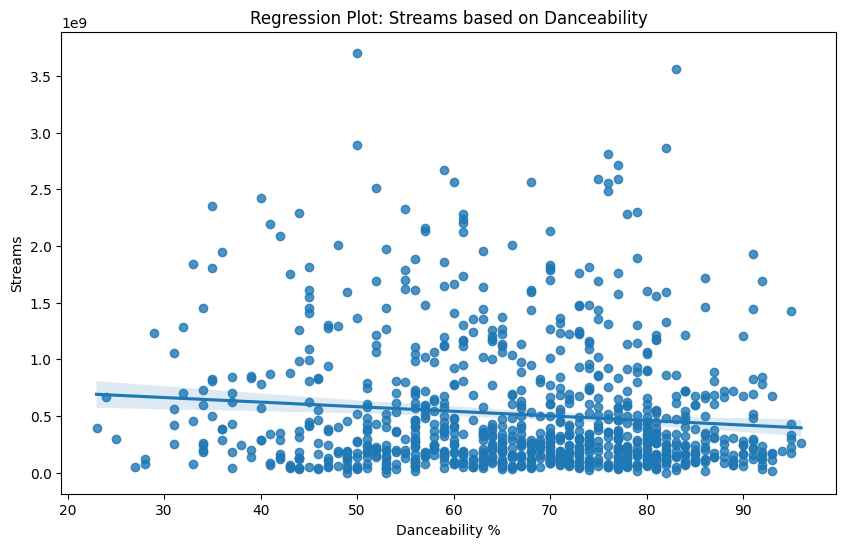

In [10]:
# Regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='danceability_%', y='streams', data=df)
plt.title('Regression Plot: Streams based on Danceability')
plt.xlabel('Danceability %')
plt.ylabel('Streams')
plt.show()


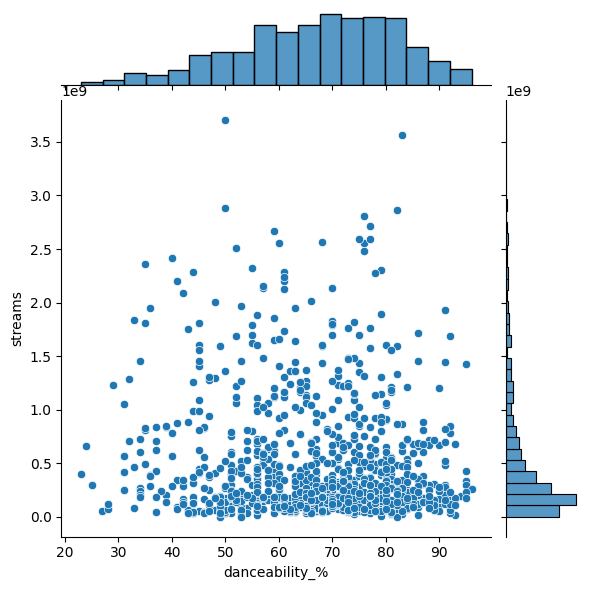

In [11]:
# Joint plot
sns.jointplot(x='danceability_%', y='streams', data=df, kind='scatter')
plt.show()

# Conclusion
There is a slightly negative correlation between "Danceablity%" and "Number of Streams".     

As the danceablity % increases, the number of streams tends to decrease slightly.   
It is recognizable that the tracks with the danceablity ranges between 50 to 80 accounts for a majority of high streaming rate.

In [12]:
correlation_coefficient = df_sorted_by_streams['streams'].corr(df_sorted_by_streams['danceability_%'])

print(f"Correlation Coefficient: {correlation_coefficient}")



Correlation Coefficient: -0.10445104424167967


The correlation is not signifcant.     

To eradicate errors, non-linear regression scatterplot is vistualized.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


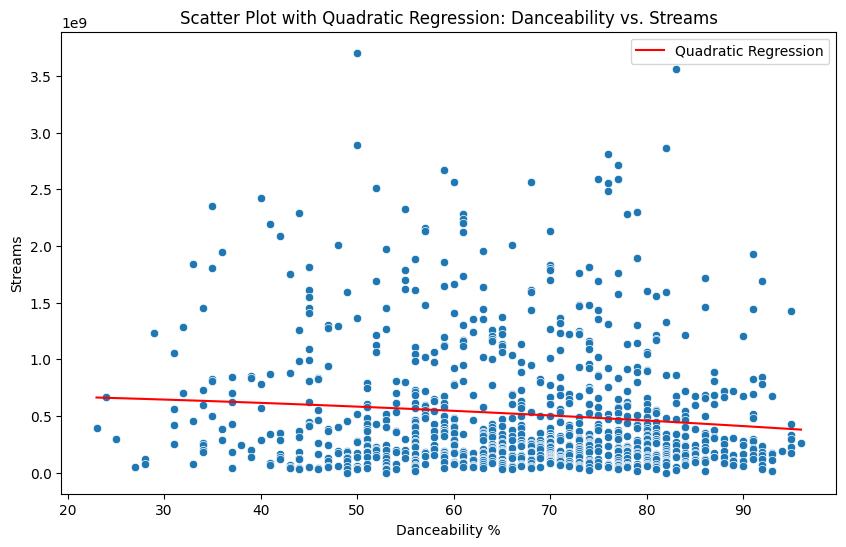

In [13]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Extract features and target variable
X = df_sorted_by_streams[['danceability_%']]
y = df_sorted_by_streams['streams']

# Fit quadratic regression model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability_%', y='streams', data=df_sorted_by_streams)

# Plot regression curve
x_values = np.linspace(X.min(), X.max(), 100)
y_values = model.predict(poly.transform(x_values.reshape(-1, 1)))
plt.plot(x_values, y_values, color='red', label='Quadratic Regression')

plt.title('Scatter Plot with Quadratic Regression: Danceability vs. Streams')
plt.xlabel('Danceability %')
plt.ylabel('Streams')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


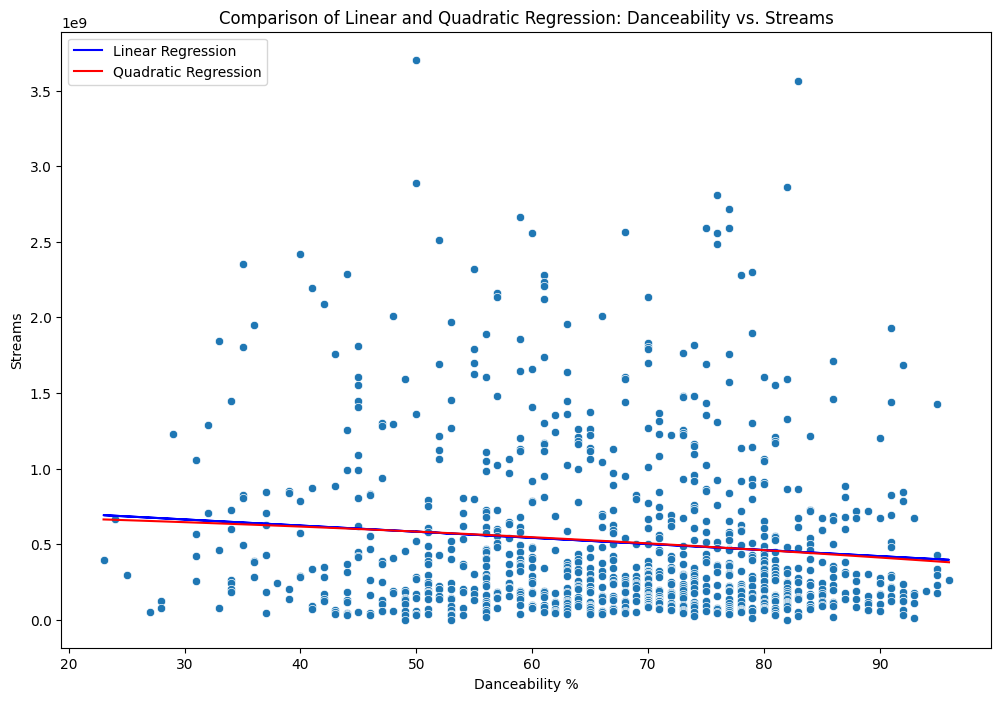

In [15]:


# Extract features and target variable
X = df_sorted_by_streams[['danceability_%']]
y = df_sorted_by_streams['streams']

# Fit linear regression model
model_linear = LinearRegression().fit(X, y)

# Fit quadratic regression model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model_quadratic = LinearRegression().fit(X_poly, y)

# Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='danceability_%', y='streams', data=df_sorted_by_streams)

# Plot linear regression line
plt.plot(X, model_linear.predict(X), color='blue', label='Linear Regression')

# Plot quadratic regression curve
x_values = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_values_quadratic = model_quadratic.predict(poly.transform(x_values))
plt.plot(x_values, y_values_quadratic, color='red', label='Quadratic Regression')

plt.title('Comparison of Linear and Quadratic Regression: Danceability vs. Streams')
plt.xlabel('Danceability %')
plt.ylabel('Streams')
plt.legend()
plt.show()


 Quadratic regression shows the same result, which decribes that
 # there is little or no relation between the danceability and the stream count.

Top 3 Most Popular Years Based on Total Streams:
released_year
2022    1.164024e+11
2021    7.380810e+10
2019    3.787093e+10
Name: streams, dtype: float64


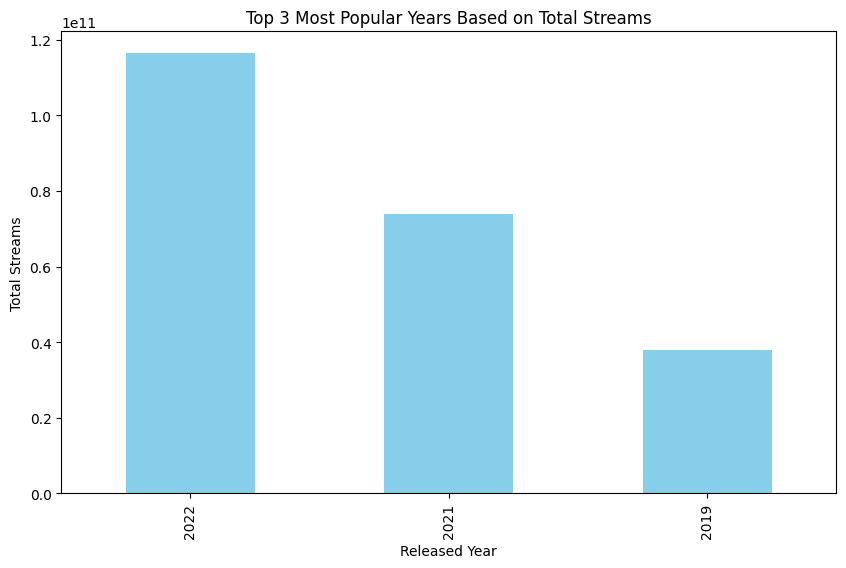

In [20]:
# group by 'released_year' and calculate the total streams for each year
total_streams_per_year = df.groupby('released_year')['streams'].sum()

# top 3 years with the maximum total streams
top3_popular_years = total_streams_per_year.nlargest(3)

print("Top 3 Most Popular Years Based on Total Streams:")
print(top3_popular_years)


# vistualization on bar chart
plt.figure(figsize=(10, 6))
top3_popular_years.plot(kind='bar', color='skyblue')
plt.title('Top 3 Most Popular Years Based on Total Streams')
plt.xlabel('Released Year')
plt.ylabel('Total Streams')
plt.show()


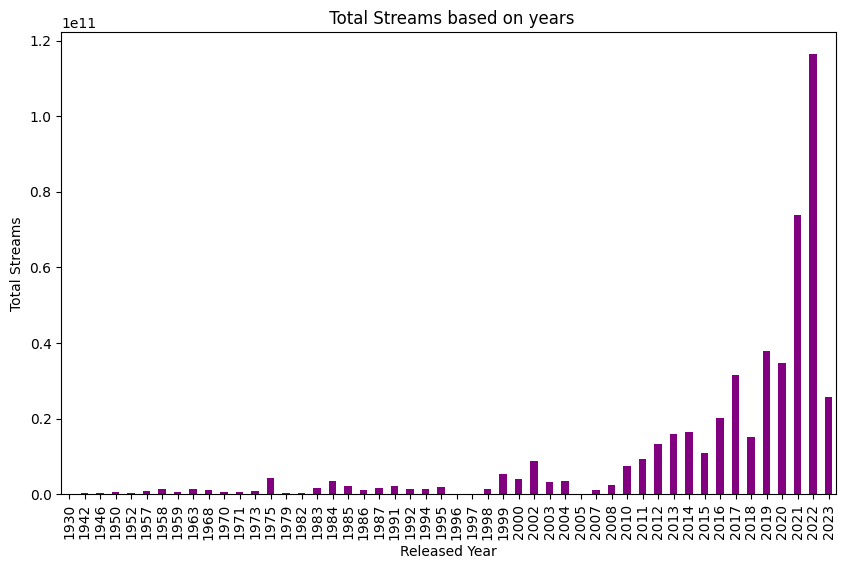

In [21]:

total_streams_per_year = df.groupby('released_year')['streams'].sum()

plt.figure(figsize=(10, 6))
total_streams_per_year.plot(kind='bar', color='purple')
plt.title(' Total Streams based on years')
plt.xlabel('Released Year')
plt.ylabel('Total Streams')
plt.show()

# Finding the relation between bpm and the number of streams

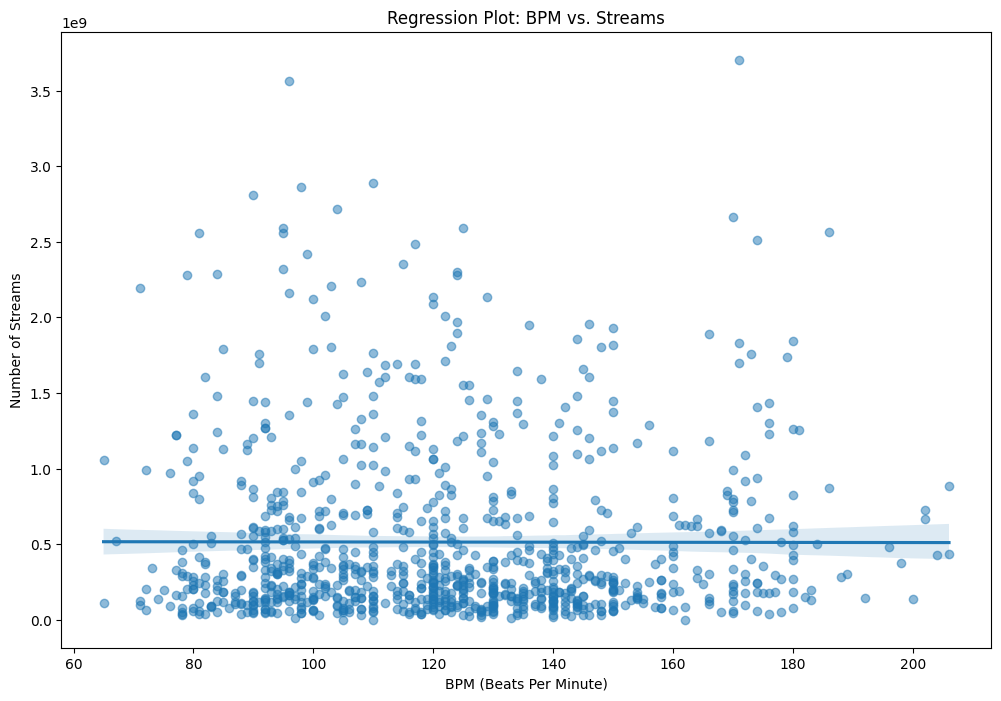

In [23]:
# regression plot
plt.figure(figsize=(12, 8))
sns.regplot(x='bpm', y='streams', data=df, scatter_kws={'alpha':0.5})
plt.title('Regression Plot: BPM vs. Streams')
plt.xlabel('BPM (Beats Per Minute)')
plt.ylabel('Number of Streams')
plt.show()

In [24]:
correlation_coefficient = df['bpm'].corr(df['streams'])
print(f"Correlation Coefficient: {correlation_coefficient}")


Correlation Coefficient: -0.0020107392431485114


The correlation coefficients of -0.002 indicates that there is no correlation between bpm and number of streams

# Finding the relation between mode and the number of streams

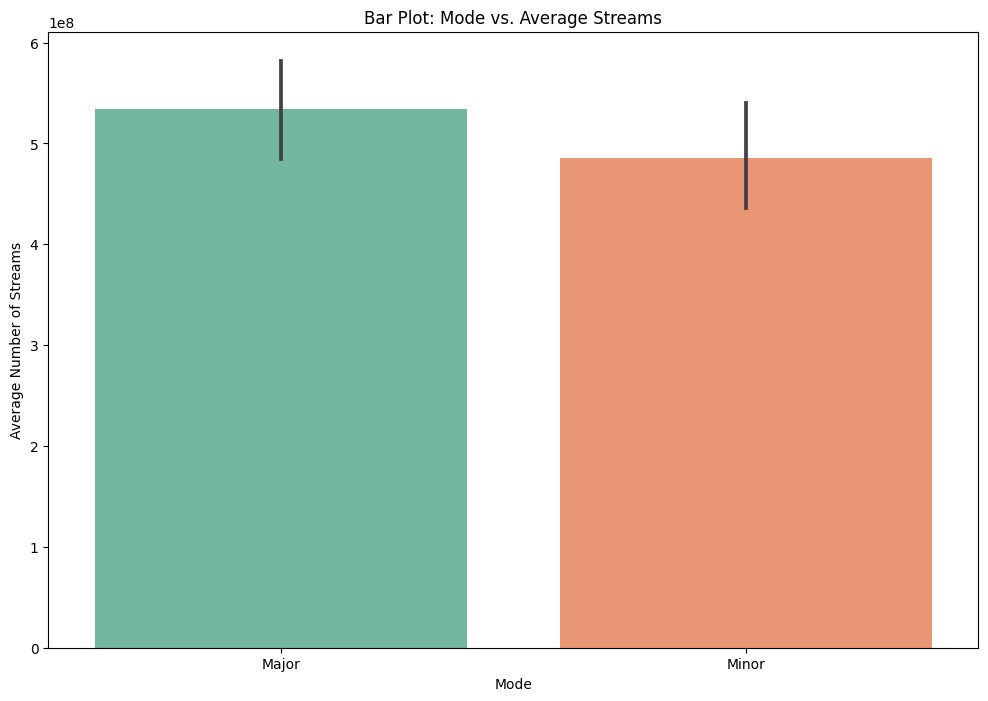

In [29]:
plt.figure(figsize=(12, 8))
sns.barplot(x='mode', y='streams', data=df, palette='Set2')
plt.title('Bar Plot: Mode vs. Average Streams')
plt.xlabel('Mode')
plt.ylabel('Average Number of Streams')
plt.show()
# conclusion : major mode is streamed more than minor mode in 2023